<a href="https://colab.research.google.com/github/Donalizasaji/Projects/blob/main/CIA3_2348515_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION MODELS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# Load the dataset
data= pd.read_csv('/content/diabetes.csv')

# Checking for missing values
# In this dataset, certain zero values are considered as missing values for some columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replacing zero values with NaN
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Imputing missing values using median for numerical columns
imputer = SimpleImputer(strategy='median')
data[columns_with_zeros] = imputer.fit_transform(data[columns_with_zeros])

# Feature scaling for numerical variables
scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

# Handling outliers using z-score
z_scores = np.abs(zscore(data))
data = data[(z_scores < 3).all(axis=1)]

# Splitting the dataset into features and target variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']

print("Data preprocessing completed successfully!")


Data preprocessing completed successfully!


In [ ]:
# Display the first few rows of the dataset
print(data.head())




   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
5     0.342981 -0.185948       0.133453      -0.012301 -0.181541 -0.997745   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
5                 -0.818079 -0.275760 -0.732120  


In [ ]:
#Summary of dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               718 non-null    float64
 1   Glucose                   718 non-null    float64
 2   BloodPressure             718 non-null    float64
 3   SkinThickness             718 non-null    float64
 4   Insulin                   718 non-null    float64
 5   BMI                       718 non-null    float64
 6   DiabetesPedigreeFunction  718 non-null    float64
 7   Age                       718 non-null    float64
 8   Outcome                   718 non-null    float64
dtypes: float64(9)
memory usage: 56.1 KB
None


In [ ]:
# Descriptive statistics
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   718.000000  718.000000     718.000000     718.000000  718.000000   
mean     -0.003204   -0.054128      -0.009293      -0.044641   -0.120089   
std       0.972755    0.975173       0.937633       0.928474    0.643709   
min      -1.141852   -2.552931      -2.844519      -2.516429   -1.455769   
25%      -0.844885   -0.744819      -0.693761      -0.467597   -0.239461   
50%      -0.250952   -0.218823      -0.031990      -0.012301   -0.181541   
75%       0.639947    0.537297       0.629782       0.329171   -0.181541   
max       2.718712    2.542658       2.945982       2.833298    2.911357   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  718.000000                718.000000  718.000000  718.000000  
mean    -0.046935                 -0.067722   -0.027251   -0.024989  
std      0.942890                  0.854446    0.962975    0.992426  
min     -2.074783                 -

**EXPLORATORY DATA ANALYSIS**

Histograms for each feature

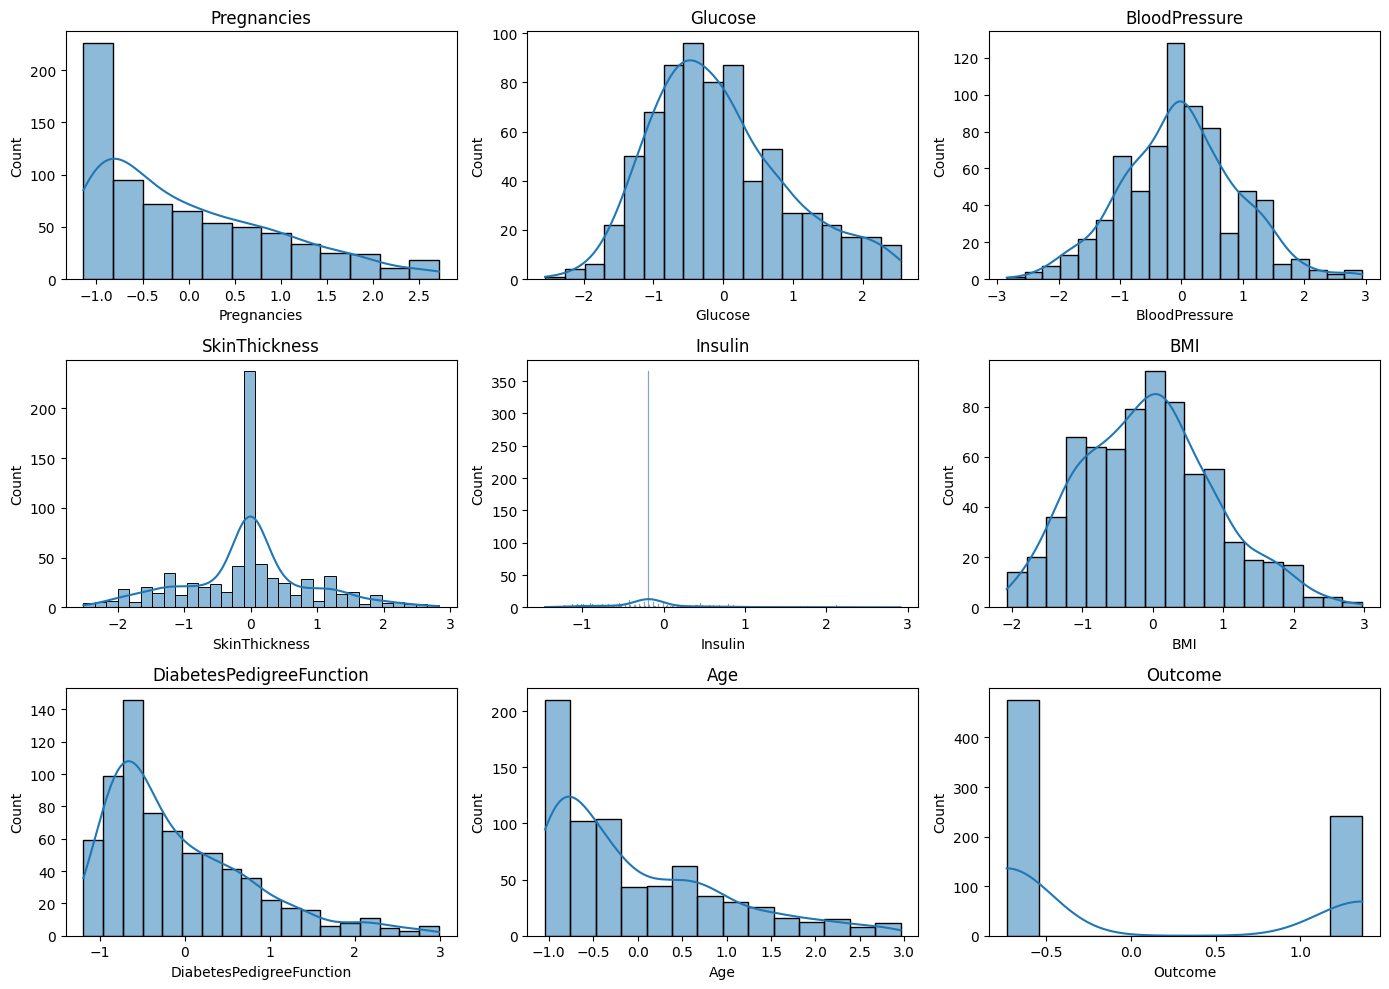

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot histograms for each feature
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


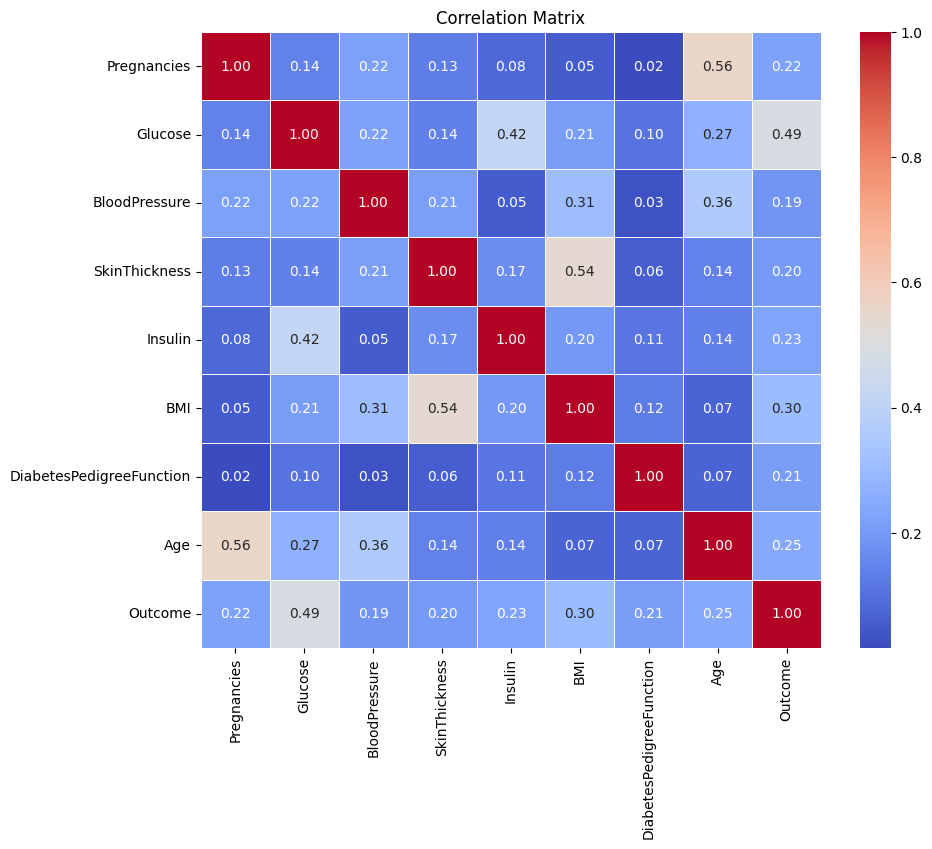

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft')
}


In [ ]:
print(y.unique())


In [ ]:
y = y.astype(int)



In [ ]:
# Ensure 'Outcome' is of integer type
data['Outcome'] = data['Outcome'].astype(int)

# Split the dataset again after ensuring the correct type
X = data.drop(columns=['Outcome'])
y = data['Outcome']


In [ ]:
print(y.unique())



In [ ]:
# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())



**MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ensure 'Outcome' is of integer type
data['Outcome'] = data['Outcome'].astype(int)

# Split the dataset into features and target variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft')
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }
    results[name] = metrics

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


**Performance Comparison:**

**1. Accuracy**

Best Performing: Random Forest (0.8148)
Worst Performing: KNN (0.7639)
The Random Forest model achieved the highest accuracy, suggesting that it is the most reliable model for classifying diabetes in this dataset. KNN performed the worst in terms of accuracy, which may indicate it is less effective at distinguishing between the classes in this dataset.

**2. Precision**

Best Performing: Logistic Regression (0.7018)
Worst Performing: Gradient Boosting (0.6250)
Logistic Regression has the highest precision, meaning it correctly identifies the highest proportion of positive predictions. This is important in a medical context where false positives can lead to unnecessary interventions.

**3. Recall**

Best Performing: Random Forest (0.7188)
Worst Performing: Gradient Boosting (0.5469)
Random Forest achieved the highest recall, indicating it successfully identifies the most true positive cases. High recall is crucial in a medical scenario to ensure that as many actual cases as possible are identified.

**4. F1 Score**

Best Performing: Random Forest (0.6970)
Worst Performing: Gradient Boosting (0.5833)
The F1 Score balances precision and recall, and Random Forest has the highest F1 Score, showing it performs well on both metrics. Gradient Boosting has the lowest F1 Score, reflecting its relatively poor balance between precision and recall.

**5. ROC-AUC**

Best Performing: Voting Classifier (0.8713)
Worst Performing: KNN (0.8131)
The ROC-AUC score measures the model's ability to distinguish between classes. The Voting Classifier has the highest ROC-AUC, indicating it has the best performance in terms of distinguishing between diabetic and non-diabetic cases. The KNN model has the lowest ROC-AUC score, suggesting it is less effective at this task.

**Discussion and Insights:**

Overall Best Model: The Random Forest model performs consistently well across most metrics, making it the overall best performer in this analysis. It strikes a good balance between accuracy, precision, recall, and F1 Score, while also having a high ROC-AUC score.

Precision vs. Recall Trade-off: The Logistic Regression model has the highest precision, which could be beneficial in minimizing false positives, but it has lower recall compared to Random Forest. This trade-off is significant in healthcare, where missing out on true cases (low recall) can be critical.

Novel Approach: The Voting Classifier, which combines multiple models (Logistic Regression, Random Forest, and SVM), achieved the highest ROC-AUC score. This suggests that combining models can enhance performance by leveraging the strengths of each individual model, leading to better discrimination between classes.

Gradient Boosting and KNN: Both of these models have lower performance compared to others. Gradient Boosting's lower F1 Score and ROC-AUC suggest it might not be as effective for this particular dataset, possibly due to the inherent complexity of the model. KNN's lower performance in terms of accuracy and ROC-AUC indicates that it might struggle with high-dimensional or noisy data.




**Conclusions:**
Random Forest is the most balanced and effective model for this dataset, providing a good combination of accuracy, precision, recall, F1 Score, and ROC-AUC.

Voting Classifier demonstrated the best ability to distinguish between the classes, highlighting the benefit of combining multiple models.
